# Load saved models

In [17]:
from joblib import dump, load
svm = load('../model/svm.joblib')
rf = load('../model/rf.joblib')
abt = load('../model/abt.joblib')
glm = load('../model/glm.joblib')

# Load Testing Set

In [2]:
import pandas as pd
test = pd.read_csv("../data/TEST.csv")
y_test = test["SEPSIS"]
X_test = test.drop("SEPSIS", axis=1)

# Helper Function

In [3]:
from sklearn.metrics import *
def classification_metrics(Y_pred, Y_true, Y_score):
    #NOTE: It is important to provide the output in the same order
    acc = accuracy_score(Y_true,Y_pred)
    bacc = balanced_accuracy_score(Y_true, Y_pred)
    auc_ = roc_auc_score(Y_true,Y_score)
    precision = precision_score(Y_true,Y_pred)
    recall = recall_score(Y_true,Y_pred)
    f1score = f1_score(Y_true,Y_pred)
    return acc, bacc, auc_, precision, recall, f1score

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize
    cmap = plt.cm.Blues

    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title="Normalized Confusion Matrix",
           ylabel='True', xlabel='Predicted')

    # Rotate the tick labels and set alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f'
    thresh = cm.max() / 2.
    # Loop over data dimensions and create text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    plt.show()

# Random Forest

In [21]:
y_pred_rf = rf.predict(X_test)
y_score_rf = rf.predict_proba(X_test)[:,1]

In [22]:
accrf, baccrf, aucrf, prerf, recrf, f1rf = classification_metrics(y_pred_rf, y_test, y_score_rf)
print("Accuracy: " + str(accrf))
print("Balanced Accuracy: " + str(baccrf))
print("AUC: " + str(aucrf))
print("Precision: " + str(prerf))
print("Recall: " + str(recrf))
print("F1 Score: " + str(f1rf))

Accuracy: 0.8164948453608247
Balanced Accuracy: 0.7895761600262339
AUC: 0.8537875061485489
Precision: 0.3644067796610169
Recall: 0.7543859649122807
F1 Score: 0.49142857142857144


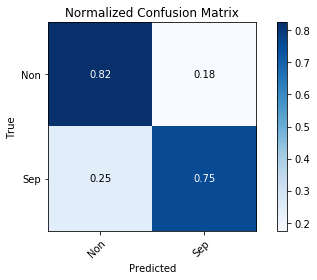

In [23]:
plot_confusion_matrix(y_test, y_pred_rf, ["Non","Sep"])

# SVM

In [8]:
y_pred_svm = svm.predict(X_test)
y_score_svm = svm.predict_proba(X_test)[:,1]

In [9]:
accsvm, baccsvm, aucsvm, presvm, recsvm, f1svm = classification_metrics(y_pred_svm, y_test, y_score_svm)
print("Accuracy: " + str(accsvm))
print("Balanced Accuracy: " + str(baccsvm))
print("AUC: " + str(aucsvm))
print("Precision: " + str(presvm))
print("Recall: " + str(recsvm))
print("F1 Score: " + str(f1svm))

Accuracy: 0.7628865979381443
Balanced Accuracy: 0.7592023282505329
AUC: 0.8192736514182652
Precision: 0.2986111111111111
Recall: 0.7543859649122807
F1 Score: 0.42786069651741293


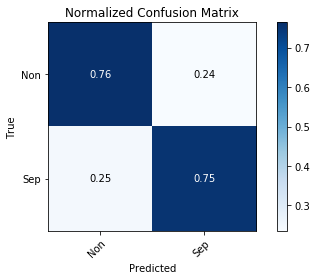

In [10]:
plot_confusion_matrix(y_test, y_pred_svm, ["Non","Sep"])

# AdaBoost

In [11]:
y_pred_abt = abt.predict(X_test)
y_score_abt = abt.predict_proba(X_test)[:,1]

In [12]:
accabt, baccabt, aucabt, preabt, recabt, f1abt = classification_metrics(y_pred_abt, y_test, y_score_abt)
print("Accuracy: " + str(accabt))
print("Balanced Accuracy: " + str(baccabt))
print("AUC: " + str(aucabt))
print("Precision: " + str(preabt))
print("Recall: " + str(recabt))
print("F1 Score: " + str(f1abt))

Accuracy: 0.8123711340206186
Balanced Accuracy: 0.772032300377111
AUC: 0.8403426791277259
Precision: 0.35344827586206895
Recall: 0.7192982456140351
F1 Score: 0.47398843930635837


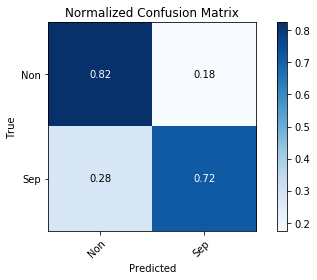

In [13]:
plot_confusion_matrix(y_test, y_pred_abt, ["Non","Sep"])

# Logistic

In [18]:
y_pred_gbt = glm.predict(X_test)
y_score_gbt = glm.predict_proba(X_test)[:,1]

In [19]:
accgbt, baccgbt, aucgbt, pregbt, recgbt, f1gbt = classification_metrics(y_pred_gbt, y_test, y_score_gbt)
print("Accuracy: " + str(accgbt))
print("Balanced Accuracy: " + str(baccgbt))
print("AUC: " + str(aucgbt))
print("Precision: " + str(pregbt))
print("Recall: " + str(recgbt))
print("F1 Score: " + str(f1gbt))

Accuracy: 0.7690721649484537
Balanced Accuracy: 0.7551032956222331
AUC: 0.8173061157566814
Precision: 0.302158273381295
Recall: 0.7368421052631579
F1 Score: 0.4285714285714286


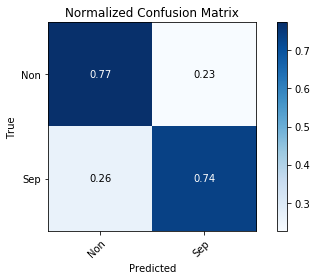

In [20]:
plot_confusion_matrix(y_test, y_pred_gbt, ["Non","Sep"])